In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
# Chargement des datasets
recipes = pd.read_csv('recipes.csv')
reviews = pd.read_csv('reviews.csv')

# Fusionner sur RecipeId
df_merged = pd.merge(reviews, recipes, on='RecipeId', how='inner')


print(df_merged.head())
print(df_merged.info())

   ReviewId  RecipeId  AuthorId_x      AuthorName_x  Rating  \
0         2       992        2008         gayg msft       5   
1         7      4384        1634     Bill Hilbrich       4   
2         9      4523        2046  Gay Gilmore ckpt       2   
3        13      7435        1773     Malarkey Test       5   
4        14        44        2085        Tony Small       5   

                                              Review         DateSubmitted  \
0       better than any you can get at a restaurant!  2000-01-25T21:44:00Z   
1  I cut back on the mayo, and made up the differ...  2001-10-17T16:49:59Z   
2  i think i did something wrong because i could ...  2000-02-25T09:00:00Z   
3  easily the best i have ever had.  juicy flavor...  2000-03-13T21:15:00Z   
4                                 An excellent dish.  2000-03-28T12:51:00Z   

           DateModified                                           Name  \
0  2000-01-25T21:44:00Z                        Jalapeno Pepper Poppers   
1  2

In [23]:
print(df_merged.columns)

Index(['ReviewId', 'RecipeId', 'AuthorId_x', 'AuthorName_x', 'Rating',
       'Review', 'DateSubmitted', 'DateModified', 'Name', 'AuthorId_y',
       'AuthorName_y', 'CookTime', 'PrepTime', 'TotalTime', 'DatePublished',
       'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')


In [25]:
print(df_merged.shape)

(1401963, 35)


In [27]:
print(df_merged.isnull().sum())

ReviewId                           0
RecipeId                           0
AuthorId_x                         0
AuthorName_x                       0
Rating                             0
Review                           214
DateSubmitted                      0
DateModified                       0
Name                               0
AuthorId_y                         0
AuthorName_y                       0
CookTime                      193128
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                       13
Images                             5
RecipeCategory                   708
Keywords                       20050
RecipeIngredientQuantities         5
RecipeIngredientParts              0
AggregatedRating                6117
ReviewCount                        0
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
S

In [29]:
# Pourcentage de valeurs nulles par colonne
null_percent = df_merged.isnull().mean() * 100
print(null_percent)


ReviewId                       0.000000
RecipeId                       0.000000
AuthorId_x                     0.000000
AuthorName_x                   0.000000
Rating                         0.000000
Review                         0.015264
DateSubmitted                  0.000000
DateModified                   0.000000
Name                           0.000000
AuthorId_y                     0.000000
AuthorName_y                   0.000000
CookTime                      13.775542
PrepTime                       0.000000
TotalTime                      0.000000
DatePublished                  0.000000
Description                    0.000927
Images                         0.000357
RecipeCategory                 0.050501
Keywords                       1.430138
RecipeIngredientQuantities     0.000357
RecipeIngredientParts          0.000000
AggregatedRating               0.436317
ReviewCount                    0.000000
Calories                       0.000000
FatContent                     0.000000


In [31]:
print(df_merged.dtypes)

ReviewId                        int64
RecipeId                        int64
AuthorId_x                      int64
AuthorName_x                   object
Rating                          int64
Review                         object
DateSubmitted                  object
DateModified                   object
Name                           object
AuthorId_y                      int64
AuthorName_y                   object
CookTime                       object
PrepTime                       object
TotalTime                      object
DatePublished                  object
Description                    object
Images                         object
RecipeCategory                 object
Keywords                       object
RecipeIngredientQuantities     object
RecipeIngredientParts          object
AggregatedRating              float64
ReviewCount                   float64
Calories                      float64
FatContent                    float64
SaturatedFatContent           float64
CholesterolC

In [83]:
import pandas as pd

# Supprimer les colonnes avec trop de valeurs nulles
df_merged = df_merged.drop(columns=['RecipeServings', 'RecipeYield'], errors='ignore')

# Séparer les colonnes numériques et textuelles
numeric_cols = df_merged.select_dtypes(include=['int64', 'float64']).columns
text_cols = df_merged.select_dtypes(include=['object']).columns

# Remplacer les valeurs nulles dans les colonnes numériques par la moyenne
for col in numeric_cols:
    df_merged[col] = df_merged[col].fillna(df_merged[col].mean())

# Supprimer les lignes contenant des valeurs nulles dans les colonnes textuelles
df_merged = df_merged.dropna(subset=text_cols)

# Vérification finale
print(df_merged.isnull().sum())
print(df_merged.shape)


ReviewId                      0
RecipeId                      0
AuthorId_x                    0
AuthorName_x                  0
Rating                        0
Review                        0
DateSubmitted                 0
DateModified                  0
Name                          0
AuthorId_y                    0
AuthorName_y                  0
CookTime                      0
PrepTime                      0
TotalTime                     0
DatePublished                 0
Description                   0
Images                        0
RecipeCategory                0
Keywords                      0
RecipeIngredientQuantities    0
RecipeIngredientParts         0
AggregatedRating              0
ReviewCount                   0
Calories                      0
FatContent                    0
SaturatedFatContent           0
CholesterolContent            0
SodiumContent                 0
CarbohydrateContent           0
FiberContent                  0
SugarContent                  0
ProteinC

In [85]:
# Affiche les lignes dupliquées
duplicates = df_merged[df_merged.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [ReviewId, RecipeId, AuthorId_x, AuthorName_x, Rating, Review, DateSubmitted, DateModified, Name, AuthorId_y, AuthorName_y, CookTime, PrepTime, TotalTime, DatePublished, Description, Images, RecipeCategory, Keywords, RecipeIngredientQuantities, RecipeIngredientParts, AggregatedRating, ReviewCount, Calories, FatContent, SaturatedFatContent, CholesterolContent, SodiumContent, CarbohydrateContent, FiberContent, SugarContent, ProteinContent, RecipeInstructions, total_time_min, calories_per_serving]
Index: []

[0 rows x 35 columns]


In [86]:
import re
import pandas as pd
import numpy as np

# Fonction pour transformer les durées ISO 8601 (ex: 'PT1H30M') en minutes
def parse_duration_to_minutes(duration_str):
    if pd.isna(duration_str) or duration_str == '':
        return np.nan
    hours_match = re.search(r'PT(\d+)H', duration_str)
    minutes_match = re.search(r'PT(?:\d+H)?(\d+)M', duration_str)
    total_min = 0
    if hours_match:
        total_min += int(hours_match.group(1)) * 60
    if minutes_match:
        total_min += int(minutes_match.group(1))
    return total_min

# Transformation des temps en minutes
df_merged['prep_min'] = df_merged['PrepTime'].apply(parse_duration_to_minutes)
df_merged['cook_min'] = df_merged['CookTime'].apply(parse_duration_to_minutes)
df_merged['total_time_min'] = df_merged['prep_min'] + df_merged['cook_min']
df_merged['total_time_min'] = df_merged['total_time_min'].fillna(df_merged['total_time_min'].median())
df_merged.drop(['prep_min', 'cook_min'], axis=1, inplace=True)

# Calcul des calories par portion
if 'RecipeServings' in df_merged.columns:
    df_merged['calories_per_serving'] = df_merged['Calories'] / df_merged['RecipeServings'].fillna(1)
else:
    # Si la colonne n'existe pas, on suppose 1 portion
    df_merged['calories_per_serving'] = df_merged['Calories'].fillna(0) / 1

# Remplacement des valeurs manquantes par la médiane
df_merged['calories_per_serving'] = df_merged['calories_per_serving'].fillna(df_merged['calories_per_serving'].median())

# Vérification finale
print(df_merged[['Calories', 'calories_per_serving']].head())
print(df_merged.isnull().sum())
print(df_merged.shape)


   Calories  calories_per_serving
1       4.6                   4.6
2     420.7                 420.7
3     756.6                 756.6
4     895.5                 895.5
6     175.7                 175.7
ReviewId                      0
RecipeId                      0
AuthorId_x                    0
AuthorName_x                  0
Rating                        0
Review                        0
DateSubmitted                 0
DateModified                  0
Name                          0
AuthorId_y                    0
AuthorName_y                  0
CookTime                      0
PrepTime                      0
TotalTime                     0
DatePublished                 0
Description                   0
Images                        0
RecipeCategory                0
Keywords                      0
RecipeIngredientQuantities    0
RecipeIngredientParts         0
AggregatedRating              0
ReviewCount                   0
Calories                      0
FatContent                  

In [87]:
print(df_merged.columns)

Index(['ReviewId', 'RecipeId', 'AuthorId_x', 'AuthorName_x', 'Rating',
       'Review', 'DateSubmitted', 'DateModified', 'Name', 'AuthorId_y',
       'AuthorName_y', 'CookTime', 'PrepTime', 'TotalTime', 'DatePublished',
       'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeInstructions', 'total_time_min', 'calories_per_serving'],
      dtype='object')


In [88]:
from sklearn.preprocessing import LabelEncoder

# Colonnes textuelles courtes / catégorielles
categorical_cols = ['AuthorName_x', 'AuthorName_y', 'RecipeCategory', 'Name']  # à adapter si besoin

for col in categorical_cols:
    le = LabelEncoder()
    df_merged[col] = le.fit_transform(df_merged[col])


In [89]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_merged.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_merged[numeric_cols])

In [90]:
from sklearn.decomposition import PCA

# Réduire à 2 composantes principales pour visualisation
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# DataFrame avec les composantes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Variance expliquée
print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)
print("Variance totale expliquée par les 2 composantes :", sum(pca.explained_variance_ratio_))


Variance expliquée par chaque composante : [0.24567482 0.08760918]
Variance totale expliquée par les 2 composantes : 0.3332840045830387


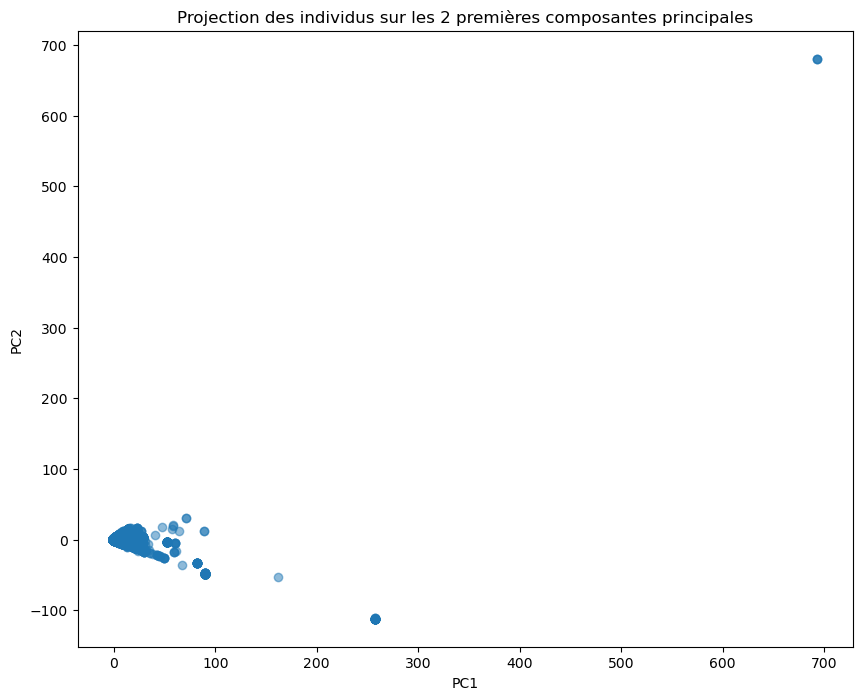

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des individus sur les 2 premières composantes principales')
plt.show()


In [92]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(data_scaled)

# Valeurs propres (variance expliquée par chaque composante)
eigenvalues = pca.explained_variance_
print("Valeurs propres :", eigenvalues)

# Composantes à retenir selon Kaiser
kaiser_components = np.sum(eigenvalues > 1)
print("Nombre de composantes selon Kaiser :", kaiser_components)


Valeurs propres : [5.40485067e+00 1.92740359e+00 1.85478449e+00 1.29877132e+00
 1.22700524e+00 1.18004955e+00 1.06796484e+00 1.00888839e+00
 1.00006389e+00 9.94344755e-01 9.64889141e-01 9.30529769e-01
 8.70595930e-01 7.35234004e-01 6.39515887e-01 3.29074679e-01
 2.92970737e-01 1.99237746e-01 4.85584985e-02 2.45454421e-02
 7.39908666e-04 0.00000000e+00]
Nombre de composantes selon Kaiser : 9


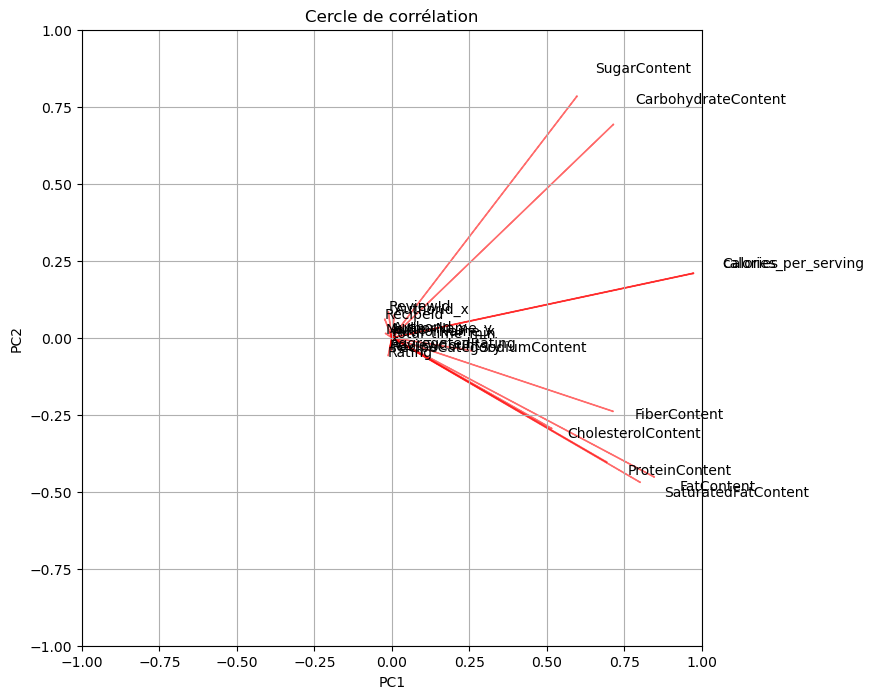

In [93]:
import matplotlib.pyplot as plt

# Coordonnées des variables sur les 2 premières composantes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(8,8))
plt.Circle((0,0), 1, color='b', fill=False)
for i, col in enumerate(numeric_cols):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1], color='r', alpha=0.5)
    plt.text(loadings[i,0]*1.1, loadings[i,1]*1.1, col, fontsize=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()
plt.show()


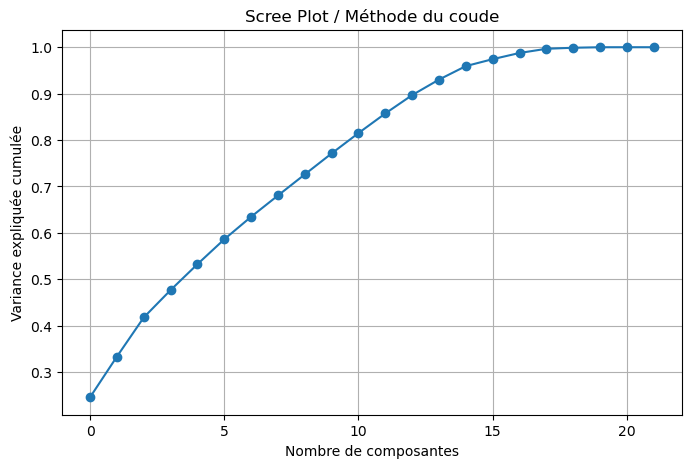

In [94]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Scree Plot / Méthode du coude')
plt.grid()
plt.show()


Colonnes numériques utilisées pour l'ACP : Index(['ReviewId', 'RecipeId', 'AuthorId_x', 'AuthorName_x', 'Rating', 'Name',
       'AuthorId_y', 'AuthorName_y', 'RecipeCategory', 'AggregatedRating',
       'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent',
       'CholesterolContent', 'SodiumContent', 'CarbohydrateContent',
       'FiberContent', 'SugarContent', 'ProteinContent', 'total_time_min',
       'calories_per_serving'],
      dtype='object')
Variance expliquée par chaque composante : [2.45674824e-01 8.76091803e-02 8.43083150e-02 5.90350104e-02
 5.57729188e-02 5.36385707e-02 4.85438155e-02 4.58585248e-02
 4.54574114e-02 4.51974509e-02 4.38585605e-02 4.22967722e-02
 3.95725091e-02 3.34196994e-02 2.90688796e-02 1.49579274e-02
 1.33168405e-02 9.05625359e-03 2.20720262e-03 1.11570098e-03
 3.36321839e-05 0.00000000e+00]
   Dimension  Valeur propre  % variance expliquée  % cum. var. expliquée
0       Dim1       5.404851                 24.57                  24.57
1       

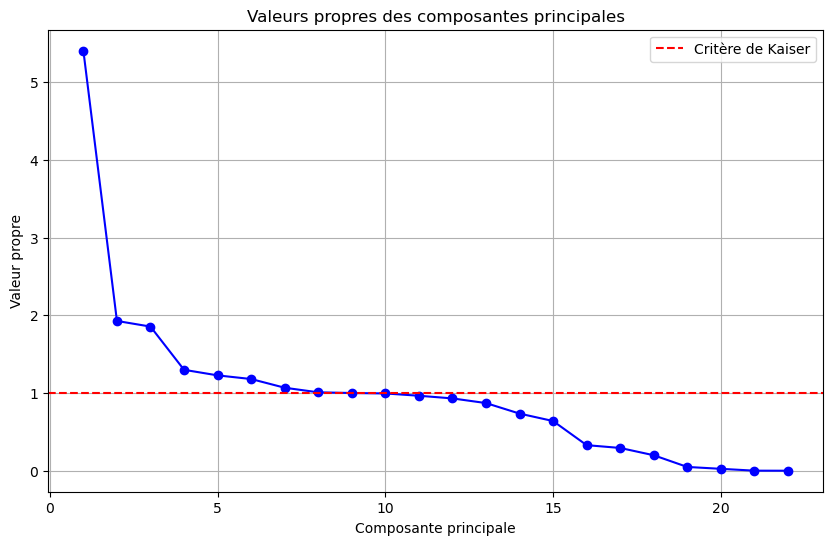

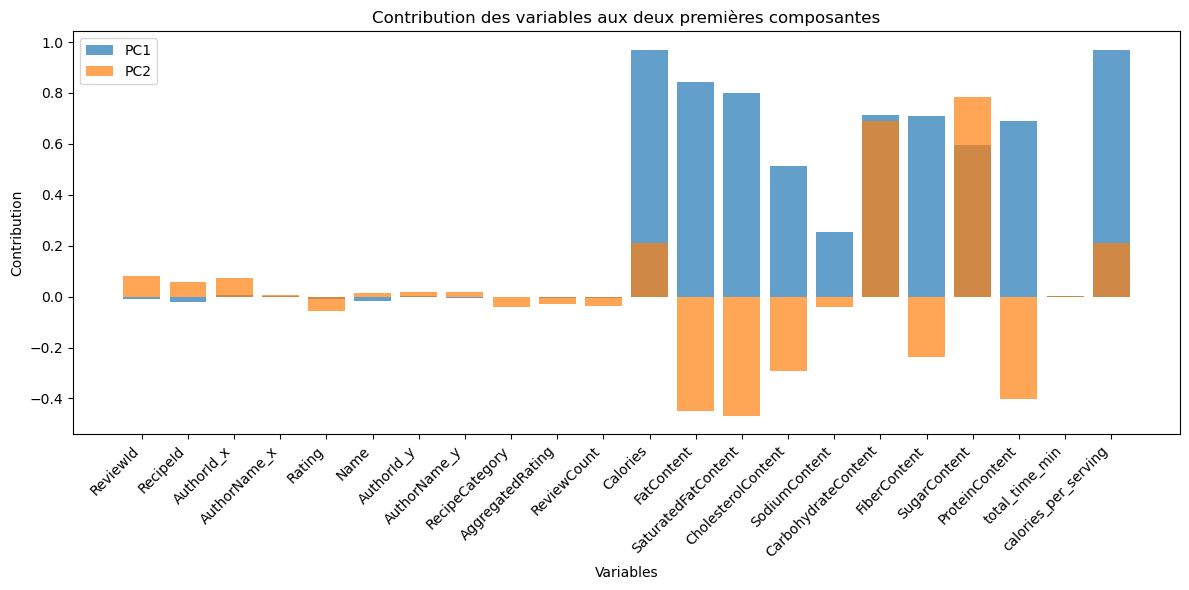

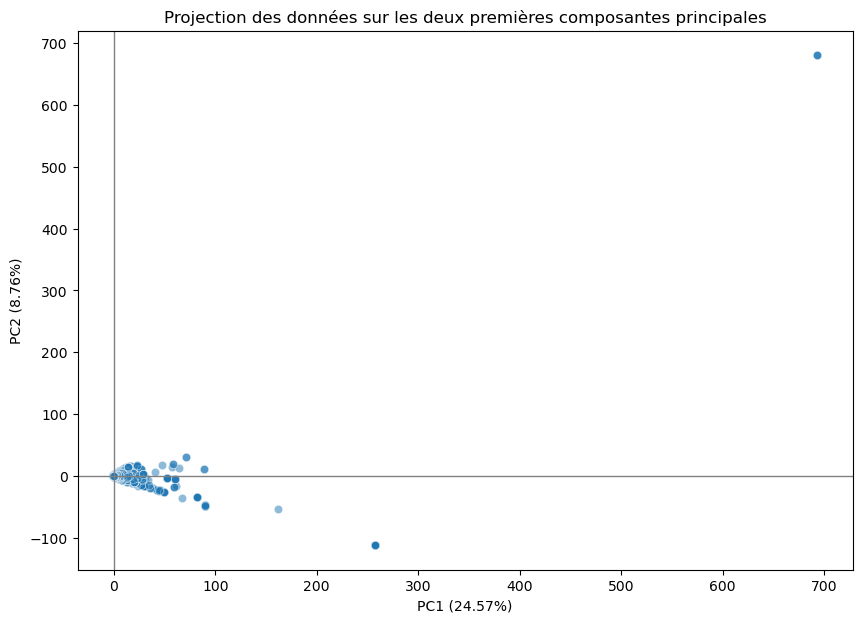

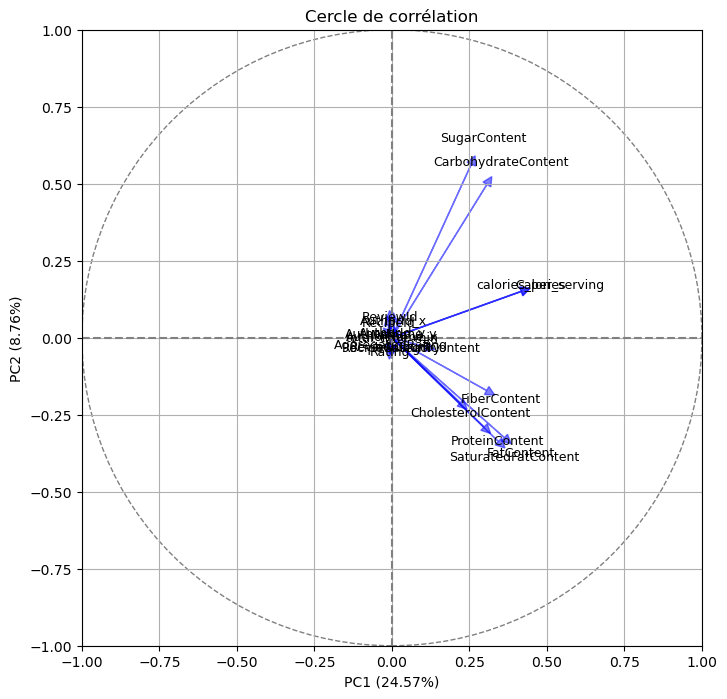

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ===============================
# 1. Sélection des colonnes numériques
# ===============================
numeric_cols = df_merged.select_dtypes(include=['int64', 'float64']).columns
data_numeric = df_merged[numeric_cols]

print("Colonnes numériques utilisées pour l'ACP :", numeric_cols)

# ===============================
# 2. Standardisation des données
# ===============================
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# ===============================
# 3. Application de l'ACP
# ===============================
pca = PCA()
pca_components = pca.fit_transform(data_scaled)

# Variance expliquée
explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante :", explained_variance)

# Tableau récapitulatif
eig = pd.DataFrame({
    "Dimension": ["Dim" + str(x + 1) for x in range(len(pca.explained_variance_))],
    "Valeur propre": pca.explained_variance_,
    "% variance expliquée": np.round(pca.explained_variance_ratio_ * 100, 2),
    "% cum. var. expliquée": np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2)
})
print(eig)

# ===============================
# 4. Scree Plot (Méthode du coude + critère de Kaiser)
# ===============================
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', color='b')
plt.axhline(y=1, color='r', linestyle='--', label='Critère de Kaiser')
plt.title("Valeurs propres des composantes principales")
plt.xlabel("Composante principale")
plt.ylabel("Valeur propre")
plt.legend()
plt.grid(True)
plt.show()

# ===============================
# 5. Contributions des variables (PC1 et PC2)
# ===============================
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(12, 6))
plt.bar(numeric_cols, loadings[:, 0], alpha=0.7, label='PC1')
plt.bar(numeric_cols, loadings[:, 1], alpha=0.7, label='PC2')
plt.xlabel('Variables')
plt.ylabel('Contribution')
plt.title('Contribution des variables aux deux premières composantes')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# ===============================
# 6. Projection des individus sur PC1 et PC2
# ===============================
pca_df = pd.DataFrame(pca_components[:, :2], columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.5)
plt.title('Projection des données sur les deux premières composantes principales')
plt.axhline(0, color='grey', linewidth=1)
plt.axvline(0, color='grey', linewidth=1)
plt.xlabel(f'PC1 ({round(explained_variance[0]*100,2)}%)')
plt.ylabel(f'PC2 ({round(explained_variance[1]*100,2)}%)')
plt.show()

# ===============================
# 7. Cercle de corrélation (PC1 et PC2)
# ===============================
pcs = pca.components_

x_vector = pcs[0, :]
y_vector = pcs[1, :]

plt.figure(figsize=(8, 8))
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

for i in range(len(numeric_cols)):
    plt.arrow(0, 0, x_vector[i], y_vector[i], color='b', alpha=0.5,
              head_width=0.03, head_length=0.03)
    plt.text(x_vector[i] * 1.15, y_vector[i] * 1.15, numeric_cols[i],
             color='black', ha='center', va='center', fontsize=9)

circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

plt.xlabel(f'PC1 ({round(explained_variance[0]*100,2)}%)')
plt.ylabel(f'PC2 ({round(explained_variance[1]*100,2)}%)')
plt.title("Cercle de corrélation")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.show()
